# <font color='green'>WORDLE-VISION!</font>
# Updated with <em>New York Times</em> official word list

In [1]:
from urllib.request import urlopen
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read in list of possible solutions

In [2]:
url = 'https://static.nytimes.com/newsgraphics/2022/01/25/wordle-solver/assets/solutions.txt' # NYT solutions list
file = urlopen(url)
solutions = set(file.read().decode('utf-8').split())

### Or if you have a word file already on your computer, you can read it in as follows:
# local_file = 'solutions.txt'
# with open(local_file) as word_file:
#     solutions = set(word_file.read().split())

print(f"There are {len(solutions)} possible Wordle solutions.")

There are 2309 possible Wordle solutions.


## Remove previous Wordle solutions from the analysis

In [3]:
previous_file = './previous_wordle_solutions_314.txt' # file containing the previous Wordle solutions (0 - 314)
with open(previous_file) as word_file:
    previous = set(word_file.read().split())
    
print(f"There are {len(previous)} previous Wordle solutions (as of 29 Apr 2022).")

There are 315 previous Wordle solutions (as of 29 Apr 2022).


In [4]:
future_solutions = solutions - previous
print(f"There are {len(future_solutions)} future Wordle solutions.")

There are 1994 future Wordle solutions.


In [5]:
# Convert future solutions to upper case list
future_solutions = [i.upper() for i in future_solutions]
future_solutions[0:10]

['UNTIE',
 'SWAMP',
 'FLOAT',
 'WAGON',
 'GROAN',
 'TAPER',
 'STARK',
 'SKIRT',
 'SNAIL',
 'TUBAL']

## Get frequency distribution of letters

In [6]:
cnt = Counter()
for i in future_solutions:
    cnt.update(Counter(i))
cnt

Counter({'U': 406,
         'N': 510,
         'T': 624,
         'I': 587,
         'E': 1069,
         'S': 580,
         'W': 168,
         'A': 836,
         'M': 274,
         'P': 315,
         'F': 197,
         'L': 623,
         'O': 636,
         'G': 270,
         'R': 758,
         'K': 179,
         'B': 239,
         'H': 326,
         'C': 404,
         'Y': 377,
         'V': 135,
         'D': 342,
         'Z': 35,
         'Q': 26,
         'X': 30,
         'J': 24})

In [7]:
cnt_sorted = dict(cnt.most_common())
cnt_sorted

{'E': 1069,
 'A': 836,
 'R': 758,
 'O': 636,
 'T': 624,
 'L': 623,
 'I': 587,
 'S': 580,
 'N': 510,
 'U': 406,
 'C': 404,
 'Y': 377,
 'D': 342,
 'H': 326,
 'P': 315,
 'M': 274,
 'G': 270,
 'B': 239,
 'F': 197,
 'K': 179,
 'W': 168,
 'V': 135,
 'Z': 35,
 'X': 30,
 'Q': 26,
 'J': 24}

In [8]:
freq_sorted = {k: round(v / (5*len(future_solutions)), 4) for k, v in cnt_sorted.items()}
freq_sorted

{'E': 0.1072,
 'A': 0.0839,
 'R': 0.076,
 'O': 0.0638,
 'T': 0.0626,
 'L': 0.0625,
 'I': 0.0589,
 'S': 0.0582,
 'N': 0.0512,
 'U': 0.0407,
 'C': 0.0405,
 'Y': 0.0378,
 'D': 0.0343,
 'H': 0.0327,
 'P': 0.0316,
 'M': 0.0275,
 'G': 0.0271,
 'B': 0.024,
 'F': 0.0198,
 'K': 0.018,
 'W': 0.0169,
 'V': 0.0135,
 'Z': 0.0035,
 'X': 0.003,
 'Q': 0.0026,
 'J': 0.0024}

In [9]:
sorted_keys = list(freq_sorted.keys())
sorted_vals = list(freq_sorted.values())

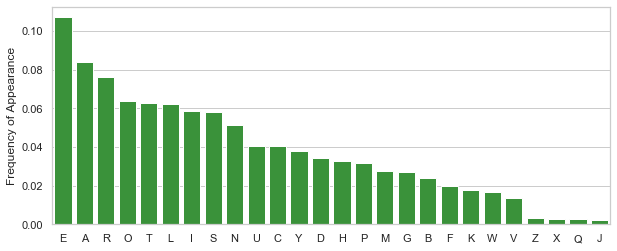

In [10]:
fig = plt.figure(figsize=(10, 4))
sns.set(style='whitegrid')
sns.barplot(x=sorted_keys, y=sorted_vals, color='tab:green')
plt.ylabel('Frequency of Appearance')
fig.savefig('letter_freq_nyt.png', dpi=200)

### The top 10 letters are the same as I found in my previous analysis, just with different frequencies

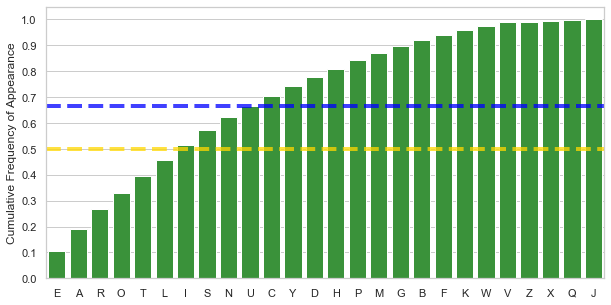

In [11]:
# As in the previous analysis, the top 7 letters account for more than half of letters among Wordle solutions
# Furthermore, the top 10 letters account for about 2/3 of all letters among Wordle solutions

fig = plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
sns.barplot(x=sorted_keys, y=np.cumsum(sorted_vals), color='tab:green')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(y=0.5, ls='--', lw=4, c='gold', alpha=0.75)
plt.axhline(y=2/3, ls='--', lw=4, c='blue', alpha=0.75)
plt.ylabel('Cumulative Frequency of Appearance')
fig.savefig('letter_freq_cumulative_nyt.png', dpi=200)

## Find words that contain only the top 7 letters
### These will be the best starting guesses

In [12]:
top_7_letters = ''.join(sorted_keys[0:7])
top_7_letter_words = []

for i in future_solutions:
    is_best = all(x in top_7_letters for x in i)
    if is_best:
        top_7_letter_words.append(i)
top_7_letter_words.sort()
print(f"There are {len(top_7_letter_words)} words containing only the top 7 letters.")

There are 27 words containing only the top 7 letters.


In [13]:
top_7_letter_words

['ALERT',
 'ALLOT',
 'ALTER',
 'AORTA',
 'ATOLL',
 'EATER',
 'EERIE',
 'ELATE',
 'ELITE',
 'IRATE',
 'LATER',
 'LATTE',
 'OTTER',
 'RARER',
 'RATIO',
 'RETRO',
 'ROTOR',
 'TAROT',
 'TERRA',
 'TIARA',
 'TITLE',
 'TOTAL',
 'TRAIL',
 'TRAIT',
 'TREAT',
 'TRIAL',
 'TRITE']

## We can further refine this by requiring that each letter be different

In [14]:
best_guesses_top_7_letters = []

for i in top_7_letter_words:
    num_uniq_letters = len(set(i))
    if num_uniq_letters == 5:
        best_guesses_top_7_letters.append(i)
print(f"There are {len(best_guesses_top_7_letters)} words \
containing only the top 7 letters where each letter is different.")

There are 7 words containing only the top 7 letters where each letter is different.


In [15]:
best_guesses_top_7_letters

['ALERT', 'ALTER', 'IRATE', 'LATER', 'RATIO', 'TRAIL', 'TRIAL']

## Find best pairs of words that use the top 10 letters without repeat letters
### For example: (AROSE, UNTIL)

In [16]:
top_10_letters = ''.join(sorted_keys[0:10])
top_10_letter_words = []

for i in future_solutions:
    is_best = all(x in top_10_letters for x in i)
    if is_best:
        top_10_letter_words.append(i)
top_10_letter_words.sort()
print(f"There are {len(top_10_letter_words)} words containing only the top 10 letters.")

There are 148 words containing only the top 10 letters.


In [17]:
best_guesses_top_10_letters = []

for i in top_10_letter_words:
    num_uniq_letters = len(set(i))
    if num_uniq_letters == 5:
        best_guesses_top_10_letters.append(i)
print(f"There are {len(best_guesses_top_10_letters)} words \
containing only the top 10 letters where each letter is different.")

There are 71 words containing only the top 10 letters where each letter is different.


In [18]:
best_guesses_top_10_letters

['AISLE',
 'ALERT',
 'ALIEN',
 'ALTER',
 'ARISE',
 'AROSE',
 'ARSON',
 'ATONE',
 'INERT',
 'INLET',
 'INTER',
 'INTRO',
 'IRATE',
 'LATER',
 'LEANT',
 'LEARN',
 'LEAST',
 'LINER',
 'LOSER',
 'LOUSE',
 'LUNAR',
 'NOISE',
 'NURSE',
 'ONSET',
 'OUTER',
 'RAISE',
 'RATIO',
 'RENAL',
 'RESIN',
 'RINSE',
 'RISEN',
 'ROAST',
 'ROUSE',
 'ROUTE',
 'SAINT',
 'SALON',
 'SANER',
 'SATIN',
 'SIREN',
 'SLAIN',
 'SLANT',
 'SLATE',
 'SNAIL',
 'SNARE',
 'SNARL',
 'SNORE',
 'SNORT',
 'SONAR',
 'STAIN',
 'STALE',
 'STARE',
 'STEAL',
 'STEIN',
 'STERN',
 'STOLE',
 'STONE',
 'SUITE',
 'TALON',
 'TENOR',
 'TONAL',
 'TORUS',
 'TRAIL',
 'TRAIN',
 'TRIAL',
 'UNITE',
 'UNLIT',
 'UNSET',
 'UNTIE',
 'UNTIL',
 'URINE',
 'UTILE']

In [19]:
# Find all possible pairing combinations. There should be n * (n-1) / 2
pairs = [(a, b) for idx, a in enumerate(best_guesses_top_10_letters) 
         for b in best_guesses_top_10_letters[idx + 1:]]

In [20]:
uniq_10_letter_pairs = []

for p in pairs:
    num_uniq_letters = len(set(p[0] + p[1]))
    if num_uniq_letters == 10:
        uniq_10_letter_pairs.append(p)

uniq_10_letter_pairs

[('ALIEN', 'TORUS'),
 ('AROSE', 'UNLIT'),
 ('AROSE', 'UNTIL'),
 ('ARSON', 'UTILE'),
 ('LOUSE', 'TRAIN'),
 ('OUTER', 'SLAIN'),
 ('OUTER', 'SNAIL'),
 ('ROUTE', 'SLAIN'),
 ('ROUTE', 'SNAIL'),
 ('SONAR', 'UTILE')]

## The above 10 pairs of words are good opening 1st and 2nd guesses that each use the top 10 letters by frequency